In [97]:
import numpy as np

In [155]:
class Organism:

    # change these required
    P_ACQUIRE_MUTATION = 0.1
    P_LOSE_MUTATION = 0.0

    def __init__(self, gene: bool = False):
        self.gene = gene

    def replicate_gene(self):

        # acquire mutation
        if (not self.gene) and (np.random.rand() < self.P_ACQUIRE_MUTATION):
            copied_gene = True
        # lose mutation (an extension; usually don't happen)
        elif self.gene and (np.random.rand() < self.P_LOSE_MUTATION):
            copied_gene = False
        # standard copy
        else:
            copied_gene = self.gene

        return copied_gene

    def divide(self):
        # Perform binary fission by replicating the genes and dividing into two organisms
        offsprings = [
            Organism(gene=self.replicate_gene()),
            Organism(gene=self.replicate_gene()),
        ]
        return offsprings

In [156]:
class Experiment:

    # change if required
    N_GENERATIONS = 15

    def __init__(self):
        self.population = []
        self.population_genome = []
        self.mutation_part = []

    def run_generations(self):

        # initialize
        self.population = [[Organism()]]
        self.population_genome.append([x.gene for x in self.population[-1]])
        self.mutation_part.append(np.mean(self.population_genome[-1]))

        for i in range(self.N_GENERATIONS - 1):
            current_generation = self.population[-1]
            new_generation = [offspring for x in current_generation for offspring in x.divide()]
            self.population.append(new_generation)
            self.population_genome.append([x.gene for x in new_generation])
            self.mutation_part.append(np.mean(self.population_genome[-1]))

    def print_population(self):
        for i in range(self.N_GENERATIONS):
            print(f"generation #{i}: {self.mutation_part[i]}")

In [157]:
experiment = Experiment()

experiment.run_generations()

experiment.print_population()

generation #0: 0.0
generation #1: 0.0
generation #2: 0.25
generation #3: 0.25
generation #4: 0.375
generation #5: 0.46875
generation #6: 0.53125
generation #7: 0.5859375
generation #8: 0.61328125
generation #9: 0.65234375
generation #10: 0.6884765625
generation #11: 0.71923828125
generation #12: 0.748779296875
generation #13: 0.773193359375
generation #14: 0.79486083984375


In [158]:
def run_experiment_series(n_experiments: int):

    n_generations = Experiment.N_GENERATIONS
    mutation_part_array = np.zeros((n_experiments, n_generations))

    for n in range(n_experiments):
        experiment = Experiment()
        experiment.run_generations()
        mutation_part_array[n, :] = np.array(experiment.mutation_part)

    return mutation_part_array

run_experiment_series(n_experiments=10)

array([[0.        , 0.        , 0.        , 0.25      , 0.375     ,
        0.53125   , 0.59375   , 0.6015625 , 0.640625  , 0.68164062,
        0.70898438, 0.73730469, 0.76416016, 0.78613281, 0.80810547],
       [0.        , 0.        , 0.25      , 0.25      , 0.3125    ,
        0.3125    , 0.359375  , 0.4453125 , 0.51953125, 0.58007812,
        0.61816406, 0.66210938, 0.69555664, 0.72790527, 0.75653076],
       [0.        , 0.        , 0.25      , 0.25      , 0.375     ,
        0.4375    , 0.5       , 0.53125   , 0.58203125, 0.63476562,
        0.67285156, 0.70703125, 0.73339844, 0.76037598, 0.7845459 ],
       [0.        , 0.        , 0.        , 0.        , 0.0625    ,
        0.125     , 0.203125  , 0.3125    , 0.38671875, 0.47265625,
        0.53320312, 0.58349609, 0.62866211, 0.66687012, 0.69720459],
       [0.        , 0.        , 0.        , 0.        , 0.0625    ,
        0.15625   , 0.171875  , 0.21875   , 0.328125  , 0.38867188,
        0.45117188, 0.49951172, 0.55615234, 

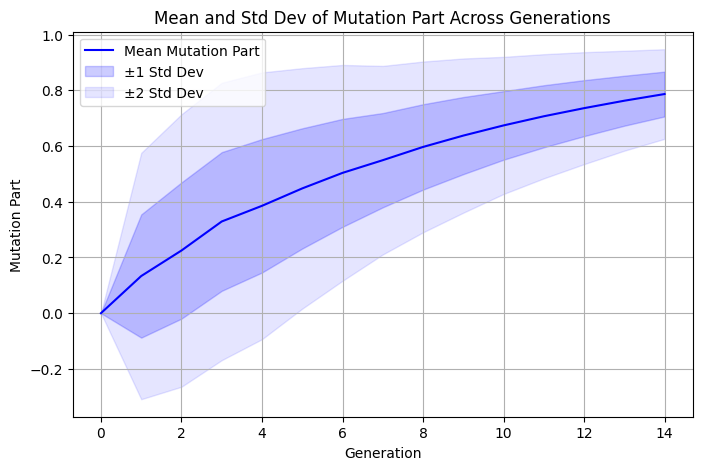

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Run the experiment series
n_experiments = 30
mutation_part_array = run_experiment_series(n_experiments)

# Compute mean and standard deviation
mean_mutation = np.mean(mutation_part_array, axis=0)
std_mutation = np.std(mutation_part_array, axis=0)
generations = np.arange(Experiment.N_GENERATIONS)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(generations, mean_mutation, label="Mean Mutation Part", color="blue")

# ±1 Std Dev
plt.fill_between(generations, mean_mutation - std_mutation, mean_mutation + std_mutation,
                 color="blue", alpha=0.2, label="±1 Std Dev")

# ±2 Std Dev
plt.fill_between(generations, mean_mutation - 2 * std_mutation, mean_mutation + 2 * std_mutation,
                 color="blue", alpha=0.1, label="±2 Std Dev")

plt.xlabel("Generation")
plt.ylabel("Mutation Part")
plt.title("Mean and Std Dev of Mutation Part Across Generations")
plt.legend()
plt.grid(True)
plt.show()